## CLIMB Deconvolution - In-Vitro dataset

CLIMB infers cell-subtype proportions through a linear combination of single-cell expression. By aggregating coefficients by cell subtype, it predicts the composition of a cell mix. We generated in vitro pools containing various ratios of HL60, SUDHL4, K562, and THP1 human leukemic cells. We use these pre-determined ratios as ground truth to assess the predictive value of CLIMB deconvolution.

In [4]:
library(climb) ; library(Biobase)

In [8]:
# METRICS FUNCTIONS
num <- function(x){ return(as.numeric(as.character(x))) }
rmse <- function(tr, pr){ return( sqrt( sum((tr - pr)^2) / length(tr) ) ) }
pcor <- function(tr, pr){ return( cor(tr, pr, method = 'pearson') ) }

## Load data

We load the data stored as `ExpressionSet` object (library `xbioc` required). We will load the scRNA-seq reference dataset in the object `sc.es` and the bulk RNA-seq from six mixtures in `bulk.es`. 

In [5]:
# Load ExpressionSet object containing scRNA-seq data from in-vitro cell mixes
sc.es = readRDS("data/invitro_sc_es.RDS")
dim(sc.es)

Features  Samples 
    6169     2342

2342 cells were sequenced and 6169 genes kept after filtering low counts with default Seurat pipeline 

In [6]:
# Load ExpressionSet object containing bulk RNA-seq data from in-vitro cell mixes
bulk.es = readRDS("data/invitro_bulk_es.RDS")
dim(bulk.es)

Features  Samples 
    6169        6

6 mixtures of cell lines with expression from 6169 genes

In [7]:
# Load True cell line proportions (based on the volume of homogeneised cells pippeted in the mixture)
true_prop = as.matrix(pData(bulk.es))
true_prop

,HL60,K562,SUDHL4,THP1
BULK1,0.2600,0.0900,0.3300,0.3200
BULK2,0.5700,0.1100,0.0700,0.2500
BULK3,0.3333,0.2222,0.0000,0.4444
BULK4,0.0500,0.0400,0.6100,0.3000
BULK5,0.0198,0.3168,0.1881,0.4752
BULK6,0.1200,0.2600,0.2000,0.4200


In [9]:
climb.res = climb(sc.es, bulk.es)

ERROR: Error in pred_exprs[[k]] <- pred_expr: attempt to select less than one element in integerOneIndex


In [14]:
y = num(exprs(bulk.es)[,1])

No id variables; using all as measure variables

No id variables; using all as measure variables



pdf 
  2

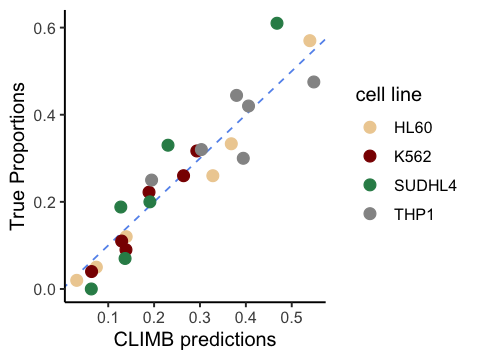

In [398]:
# Plot and display the results 
options(repr.plot.width=4, repr.plot.height=3)
df_cor = cbind(reshape2::melt(data.frame(true_prop)), 
               reshape2::melt(data.frame(climb_sce_prop)))
colnames(df_cor) = c('cell line', 'True Proportions', 'x', 'CLIMB predictions')
g = ggplot(df_cor) + geom_abline(slope=1, linetype = "dashed", colour='cornflowerblue') + 
    geom_point(aes(y=`True Proportions`, x=`CLIMB predictions`, colour=`cell line`), size=3) + theme_classic2() + 
    scale_color_manual(values=c('navajowhite2',  'darkred', 'seagreen', 'grey58')) +
    ylab('True Proportions') + xlab('CLIMB predictions')
pdf("results/invitro_CLIMB_SCEnorm_deconvolution.pdf", width=5, height=4) ; g ; dev.off()
g

In [420]:
rmse(as.vector(true_prop), as.vector(climb_totExpr_prop))

[1] 0.05628396